In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2024-04-08 10:20:42.497338: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 10:20:43.467097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def read_data(pathC,pathE):
    df  = pd.DataFrame(columns =['x1','y1','z1','x2','y2','z2','x3','y3','z3'])
    c = []

    with open(pathC) as f:
        for line in f:
            if(line[0]=='H' or line[0]=='O'):
                cords=(line.split())
                c.append(float(cords[1]))
                c.append(float(cords[2]))
                c.append(float(cords[3]))
                
                if(len(c)==9):              
                    df.loc[len(df.index)] = c
                    c=[]

    with open(pathE) as f:
        for line in f:
            c.append(float(line.strip()))
    df.insert(9,"energy",c)

    return df


def get_dist(x1,y1,z1,x2,y2,z2):
    return np.sqrt( (x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2 )

def normalize_data(df):
    return df.iloc[:,0:].apply(lambda x: (x-x.mean())/(x.max() - x.min()), axis=0)

In [4]:
h2o_unrotated = read_data("./data/H2O_unrotated.xyz","./data/H2O_unrotated.ener")
h2o_test = read_data("./data/H2O_test.xyz","./data/H2O_test.ener")
h2o_rotated = read_data("./data/H2O_rotated.xyz","./data/H2O_rotated.ener")

In [5]:
h2o_rotated.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,energy
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,0.254273,0.140451,0.120025,0.214996,0.280351,0.225502,0.078098,0.125235,0.202120,-76.376522
std,5.638545,5.671937,5.668902,5.650367,5.652361,5.651572,5.718155,5.692253,5.661974,0.003653
min,-10.693631,-10.506496,-10.393386,-10.060697,-10.125863,-10.235891,-10.638510,-10.671854,-10.317953,-76.380752
25%,-4.414594,-4.437316,-4.600717,-4.426472,-4.423391,-4.357949,-4.647912,-4.656413,-4.539722,-76.379181
50%,0.340002,0.212041,0.198453,0.318543,0.337848,0.337980,0.199021,0.089593,0.251248,-76.377624
75%,5.193472,4.959406,4.986227,5.172096,5.242135,5.166992,5.010558,5.023500,5.137699,-76.375009
max,10.527868,10.598302,10.375763,10.185401,10.260749,10.293548,10.604322,10.707676,10.238004,-76.354093


In [6]:
h2o_distances = pd.DataFrame(columns=['OH1','OH2','HH'])

for molecule in h2o_unrotated.iterrows():
    atoms = molecule[1]
    oh1 = get_dist(atoms.x1,atoms.y1,atoms.z1,atoms.x2,atoms.y2,atoms.z2)
    oh2 = get_dist(atoms.x3,atoms.y3,atoms.z3,atoms.x2,atoms.y2,atoms.z2)
    hh  = get_dist(atoms.x1,atoms.y1,atoms.z1,atoms.x3,atoms.y3,atoms.z3)
    h2o_distances.loc[len(h2o_distances.index)] = [oh1,oh2,hh]

h2o_distances.insert(3,"energy",h2o_unrotated.energy)

In [7]:
h2o_distances_test = pd.DataFrame(columns=['OH1','OH2','HH'])

for molecule in h2o_test.iterrows():
    atoms = molecule[1]
    oh1 = get_dist(atoms.x1,atoms.y1,atoms.z1,atoms.x2,atoms.y2,atoms.z2)
    oh2 = get_dist(atoms.x3,atoms.y3,atoms.z3,atoms.x2,atoms.y2,atoms.z2)
    hh  = get_dist(atoms.x1,atoms.y1,atoms.z1,atoms.x3,atoms.y3,atoms.z3)
    h2o_distances_test.loc[len(h2o_distances_test.index)] = [oh1,oh2,hh]

h2o_distances_test.insert(3,"energy",h2o_test.energy)

In [8]:
h2o_rot_distances = pd.DataFrame(columns=['OH1','OH2','HH'])

for molecule in h2o_rotated.iterrows():
    atoms = molecule[1]
    oh1 = get_dist(atoms.x1,atoms.y1,atoms.z1,atoms.x2,atoms.y2,atoms.z2)
    oh2 = get_dist(atoms.x3,atoms.y3,atoms.z3,atoms.x2,atoms.y2,atoms.z2)
    hh  = get_dist(atoms.x1,atoms.y1,atoms.z1,atoms.x3,atoms.y3,atoms.z3)
    h2o_rot_distances.loc[len(h2o_rot_distances.index)] = [oh1,oh2,hh]

h2o_rot_distances.insert(3,"energy",h2o_rotated.energy)

In [9]:
h2o_rot_distances

,OH1,OH2,HH,energy
0,1.010110,0.921727,1.575566,-76.376448
1,0.879404,1.013385,1.541574,-76.369670
2,0.988207,0.916030,1.519479,-76.377519
3,0.907936,0.908788,1.509746,-76.372594
4,0.910070,0.997601,1.486468,-76.376294
...,...,...,...,...
1745,0.967991,0.879471,1.545238,-76.370585
1746,0.962867,0.943265,1.593811,-76.378377
1747,0.939703,0.938571,1.525009,-76.378841
1748,1.002135,0.900750,1.468643,-76.374492


In [10]:
inp_data = normalize_data(h2o_distances)
tst_data = normalize_data(h2o_distances_test)
rot_data = normalize_data(h2o_rot_distances)

# inp_data = pd.concat([inp_data,rot_data])

In [11]:
inp_data.describe()

,OH1,OH2,HH,energy
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03
mean,1.745905e-16,-3.877533e-16,-1.832185e-16,2.994322e-13
std,1.758925e-01,1.986274e-01,1.902913e-01,1.370346e-01
min,-5.106211e-01,-4.997594e-01,-4.780469e-01,-1.586852e-01
25%,-1.239490e-01,-1.440835e-01,-1.353381e-01,-9.975767e-02
50%,-3.481928e-03,1.423257e-03,-5.599890e-03,-4.133408e-02
75%,1.260632e-01,1.409568e-01,1.355059e-01,5.676247e-02
max,4.893789e-01,5.002406e-01,5.219531e-01,8.413148e-01


In [16]:
keras.backend.clear_session()

In [17]:
def get_model(shape):
    model = keras.Sequential()

    model.add( keras.layers.Input(shape=(shape,)))
    # model.add( keras.layers.Input(shape=(shape,)))

    model.add( keras.layers.Dense(
        32,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l2(1e-6),
        bias_regularizer=keras.regularizers.l2(1e-6)
    ))
    model.add( keras.layers.Dense(
        16,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l2(1e-6),
        bias_regularizer=keras.regularizers.l2(1e-6)
    ))
    model.add( keras.layers.Dense(
        8,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l2(1e-6),
        bias_regularizer=keras.regularizers.l2(1e-6)
    ))
    model.add( keras.layers.Dense(
        1,
        kernel_regularizer=keras.regularizers.l2(1e-6),
        use_bias=False
    ))

    model.compile(optimizer=keras.optimizers.Adam(0.001),loss='mse')
    # print(model.summary())
    return model

In [27]:
history = []

for i in range(250,2000,250):
    train, val = train_test_split(inp_data[0:i], test_size=0.2,random_state=8123)
    model = get_model(3)
    print(f'Input Data size : {i}')
    history.append(model.fit(train.iloc[:,0:-1],train.iloc[:,-1:],validation_data=(val.iloc[:,0:-1],val.iloc[:,-1:]),epochs=300))

Input Data size : 250
Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5221 - val_loss: 0.3693
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3422 - val_loss: 0.2252
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2047 - val_loss: 0.1292
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1123 - val_loss: 0.0719
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0594 - val_loss: 0.0426
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0338 - val_loss: 0.0301
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207 - val_loss: 0.0262
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - val_loss: 0.0259
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - val_loss: 0.0262
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - val_loss: 0.0264
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - val_loss: 0.0263
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.01

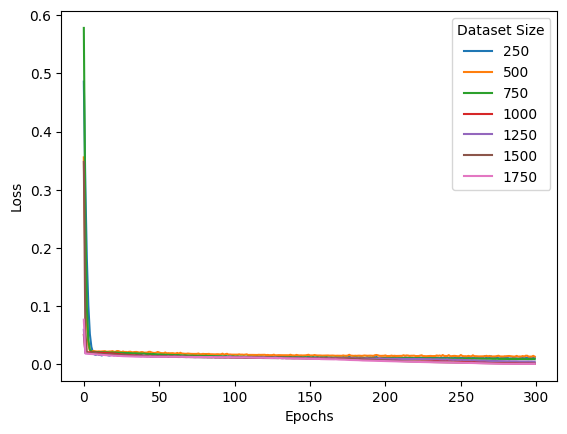

In [42]:
for i in range(len(history)):
    plt.plot(history[i].history['loss'],label=f"{(i+1)*250}")
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(title="Dataset Size")

In [52]:
# test_energies = tst_data.iloc[:,-1:]
# test_cords = tst_data.iloc[:,0:-1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


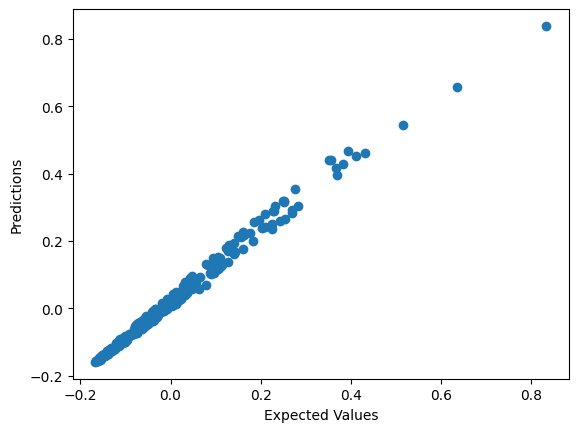

0.027225575764357506


In [53]:
# predictions = model.predict(test_cords)
# rmse = np.sqrt(np.mean((predictions-test_energies)**2))

# plt.scatter(test_energies, predictions)
# plt.xlabel('Expected Values')
# plt.ylabel('Predictions')
# plt.show()

# print(rmse)